In [1]:
import sys
import random
import copy
import math
from matplotlib import pyplot as plt
INT_MAX = sys.maxsize

In [2]:
n = int(input('Enter the number of jobs : '))
m = int(input('Enter the number of machines : '))
processing_time_matrix = []
ordering_matrix = []

ptm = input('Enter the processing time matrix : ')
om = input('Enter the ordering matrix : ')

#IMPLEMENTING G&T ALGORITHM

ptm = ptm.split(' ')
om = om.split(' ')

k=0
for i in range(0,n):
    temp = []
    for j in range(0,m):
        processing_time = int(ptm[k])
        temp.append(processing_time)
        k=k+1
    processing_time_matrix.append(temp)

k=0
for i in range(0,n):
    temp = []
    for j in range(0,m):
        order = int(om[k])
        temp.append(order)
        k=k+1
    ordering_matrix.append(temp)

print()
print('----- PROCESSING MATRIX -----')
print(processing_time_matrix)

print()
print('----- ODERING MATRIX -----')
print(ordering_matrix)


Enter the number of jobs : 20
Enter the number of machines : 15
Enter the processing time matrix : 25 75 75 76 38 62 38 59 14 13 46 31 57 92 3 67 5 11 11 40 34 77 42 35 96 22 55 21 29 16 22 98 8 35 59 31 13 46 52 22 18 19 64 29 70 99 42 2 35 11 92 88 97 21 56 17 43 27 19 23 50 5 59 71 47 39 82 35 12 2 39 42 52 65 35 48 57 5 2 60 64 86 3 51 26 34 39 45 63 54 40 43 50 71 46 99 67 34 6 95 67 54 29 30 60 59 3 85 6 46 49 5 82 18 71 48 79 62 65 76 65 55 81 15 32 52 97 69 82 89 69 87 22 71 63 70 74 52 94 14 81 24 14 32 39 67 59 18 77 50 18 6 96 53 35 99 39 18 14 90 64 81 89 48 80 44 75 12 13 74 59 71 75 30 93 26 30 84 91 93 39 56 13 29 55 69 26 7 55 48 22 46 50 96 17 57 14 8 13 95 53 78 24 92 90 68 87 43 75 94 93 92 18 28 27 40 56 83 51 15 97 48 53 78 39 47 34 42 28 11 11 30 14 10 4 20 92 19 59 28 69 82 64 40 27 82 27 43 56 17 18 20 98 43 68 84 26 87 61 95 23 88 89 49 84 12 51 3 44 20 43 54 18 72 70 28 20 22 59 36 85 13 73 29 45 7 97 4 22 74 45 62 95 66 14 40 23 79 34 8
Enter the ordering mat

In [3]:
def make_population():
    
    S= []
    curr_time = 0
    
    #STEP 1
    set_A = []
    for i in range(0,n):
        for j in range(0,m):
            if ordering_matrix[i][j] == 1:
                set_A.append([0,i,j])
    
    while len(set_A) != 0:
        #STEP 2
        length_A = len(set_A)
        min_value = INT_MAX
        for i in range(0,length_A):
            a = set_A[i][1]
            b = set_A[i][2]
            processing_time = processing_time_matrix[a][b]
            if set_A[i][0] + processing_time < min_value:
                min_value = set_A[i][0] + processing_time
        #STEP 3
        M = []
        for i in range(0,length_A):
            if set_A[i][0] < min_value:
                M.append(set_A[i][2])
        #STEP 4
        G = []
        set_machines = set(M)
        random_machine = random.randint(0,len(set_machines)-1)
        random_machine = M[random_machine]
        for i in range(0,length_A):
            if set_A[i][2] == random_machine:
                G.append(set_A[i])
            
        #STEP 5
        length_G = len(G)
        max_earlist_time = 0
        element = []
        for i in range(0,length_G):
            if G[i][2] == random_machine:
                earlist_time = 0
                b = random_machine
                a = G[i][1]
                order_number = ordering_matrix[a][b]
                for j in range(0,m):
                    if ordering_matrix[a][j] >= order_number:
                        earlist_time = earlist_time + processing_time_matrix[a][j]
                if earlist_time > max_earlist_time:
                    max_earlist_time = earlist_time
                    element = G[i]
            
        S.append(element[1])
        curr_time = curr_time + processing_time_matrix[element[1]][random_machine]
        next_order_number = ordering_matrix[element[1]][random_machine]+1

        for k in range(0,m):
            if ordering_matrix[element[1]][k] == next_order_number:
                set_A.append([curr_time,element[1],k])
        set_A.remove(element)
        G.remove(element)
    return S

In [4]:
population_size = int(input('Enter the population size : '))
population = []
for i in range(0,population_size):
    population.append(make_population())

Enter the population size : 50


In [5]:
def changeToReal(population):
    n = len(population)
    m = len(population[0])
    for i in range(0,n):
        for j in range(0,m):
            population[i][j] = round(population[i][j] +random.random(),5)
    return population

In [6]:
real_population = changeToReal(population)

In [7]:
number_iterations = int(input('Enter the number of iterations of IPSO : '))

Enter the number of iterations of IPSO : 1000


In [8]:
def calculateMakeSpan(schedule):
    job_schedule = []
    machine_free = []
    operation_no = []
    
    for i in range(0,n):
        job_schedule.append(0)
        operation_no.append(0)
    
    for i in range(0,m):
        machine_free.append(0)
    
    timer = 0
    
    while(True):
        flag = True
        
        for s in schedule:
            if s != -1:
                flag = False
       
        if flag == True:
            break
        
        for i in range(0,len(schedule)):
            s = int(schedule[i])
            if s != -1:
                if timer > job_schedule[s]:
                    machine = int(findMachine(s,operation_no[s]+1))
                    if timer > machine_free[machine]:
                        machine_free[machine] = timer + processing_time_matrix[s][machine]
                        job_schedule[s] = timer + processing_time_matrix[s][machine]
                        schedule[i] = -1
                        operation_no[s] = operation_no[s]+1
        timer = timer+1
        
    makespan = 0
    for i in job_schedule:
        if i > makespan:
            makespan = i
    return makespan

def findMachine(s,on):
    for j in range(0,m):
        if ordering_matrix[s][j] == on:
            return j
    return 1    

In [9]:
def isValid(schedule):
    jobs = []
    for i in range(0,n):
        jobs.append(0)
    for s in schedule:
        temp = int(s)
        jobs[temp] = jobs[temp]+1
    for i in range(0,n):
        if jobs[i] != m:
            print(jobs)
            return False
    return True

In [42]:
#START To IMPLEMENT IPSO
p_best_span = []
p_best = population[:]
R = []
g_best_span = INT_MAX
g_best =[]
for p in population:
    make_span = calculateMakeSpan2(p[:])
    p_best_span.append(make_span)
    if make_span < g_best_span:
        g_best_span = make_span
        g_best = p[:]
    R.append(findR(p[:],g_best[:]))
print(p_best_span)
print(g_best_span)
print(g_best)

[2234, 2013, 2188, 2151, 1977, 2119, 2144, 2162, 2032, 2082, 2092, 1977, 2262, 2024, 2095, 2061, 2077, 2038, 2076, 1967, 2039, 2063, 2272, 2037, 2043, 2049, 2087, 2009, 2115, 1929, 2061, 2016, 1997, 2028, 2095, 2187, 2105, 2023, 2137, 2039, 1962, 2105, 2090, 2234, 2090, 1982, 1963, 2113, 2095, 2128]
1929
[11.7837, 13.78661, 19.01699, 7.55973, 7.85605, 6.08656, 1.29079, 10.86897, 3.45033, 12.27148, 9.55926, 13.82785, 14.19509, 17.49825, 2.99383, 16.96593, 5.27339, 18.19216, 11.62478, 2.85669, 8.42684, 4.5741, 0.09507, 15.26734, 10.61148, 7.63915, 8.36833, 19.18909, 6.19516, 1.04821, 3.99143, 13.85082, 12.69246, 11.58243, 9.88856, 8.90809, 14.12572, 17.30389, 16.24401, 17.43777, 4.99819, 5.44621, 6.29545, 11.00687, 18.46872, 2.5398, 0.61278, 6.04151, 12.00134, 1.37252, 15.90081, 10.41501, 17.35819, 11.31948, 7.22395, 19.86779, 3.10428, 13.83561, 16.45466, 9.12198, 8.46102, 14.41386, 13.93872, 17.14224, 4.99424, 5.61643, 18.96141, 2.19506, 6.81617, 0.75073, 12.48823, 9.9216, 1.68652, 11.5

In [43]:
def findR(p_best,g_best):
    rand1 = round(random.random(),5)
    rand2 = round(random.random(),5)
    c1 = c2 = 1.4
    alpha = 0.5
    temp = []
    for i in range(0,len(p_best)):
        a = ((1-alpha)*c1*rand1*p_best[i]+alpha*c2*rand2*g_best[i])/((1-alpha)*c1*rand1+alpha*c2*rand2)
        temp.append(round(a,5))
    return temp

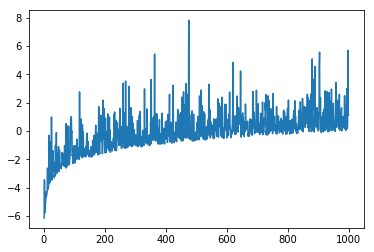

In [195]:
Beta = []
x_axis = []
for i in range(1,number_iterations):
    temp = math.log((i)/(number_iterations*random.random()))
    Beta.append(temp)
    x_axis.append(i)
plt.plot(x_axis,Beta)
plt.show()

In [ ]:
g_graph_x = []
g_graph_y = []
for i in range(0,number_iterations):
    alpha = ((i+1)/number_iterations)
    g_graph_x.append(i)
    g_graph_y.append(g_best_span)
    for k in range(0,len(population)):
        temp = []
        r = population[k]
        random_number = random.random()
        if random_number > 0.5:
            r = p_best[k]
        else:
            ml = random.randint(0,len(population)-1)
            r = p_best[ml]
        for j in range(0,len(population[k])):
            beta = round(math.log(1+((i+1)/number_iterations*random.random())),5)
            a = R[k][j] + alpha*abs(beta) * (r[j]-population[k][j])
            temp.append(a)
        temp2 = encode(temp)
        if(isValid(temp2)):
            makespan = calculateMakeSpan(temp2)
            if makespan < g_best_span:
                g_best_span = makespan
                g_best = temp
                tabuSearch(g_best,g_best_span)
            if makespan < p_best_span[k]:
                p_best_span[k] = makespan
                p_best[k] = temp
        else:
            print('not a valid schedule')
        R[k] = findR(p_best[k][:],g_best[:])

In [45]:
def encode(schedule):
    temp = sorted(schedule)
    encoded = []
    for i in range(0,len(schedule)):
        k = temp.index(schedule[i])
        encoded.append(k+1)
    for i in range(0,len(encoded)):
        encoded[i] = math.ceil(encoded[i]/m)-1
    return encoded

[1916, 1973, 1916, 1916, 1916, 1945, 1916, 1914, 1911, 2015, 1916, 1977, 1916, 1916, 1916, 1916, 1916, 1875, 1916, 1875, 1909, 1875, 1916, 1875, 2043, 1916, 1929, 1905, 1933, 1875, 1916, 1916, 1948, 1916, 1916, 1970, 1911, 1875, 1900, 1929, 1962, 1929, 1929, 1929, 2036, 1982, 1916, 2113, 1916, 1929]
1875


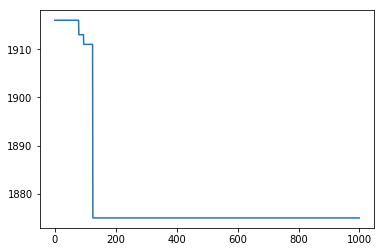

In [49]:
print(p_best_span)
print(g_best_span)
g_best_span2 = calculateMakeSpan2(encode(g_best))
plt.plot(g_graph_x,g_graph_y)

In [47]:
#IMPLEMENT TABU SEARCH
def tabuSearch(g_best,g_best_span):
    g_best_encoded = encode(g_best)
    for i in range(0,len(g_best_encoded)-1):
        if(g_best_encoded[i]!=g_best_encoded[i+1]):
            temp = g_best_encoded
            a = temp[i]
            temp[i] = temp[i+1]
            temp[i+1] = a
            span = calculateMakeSpan(temp)
            if span < g_best_span:
                g_best_span = span
                b = g_best[i]
                g_best[i] = g_best[i+1]
                g_best[i+1] = b

In [11]:
matrix = []
def makeMatrix():
    for j in range(0,n):
        temp = []
        for i in range (1,m+1):
            k = ordering_matrix[j].index(i)
            temp.append([i,k,processing_time_matrix[j][k]])
        matrix.append(temp)
makeMatrix()
print(matrix)

[[[1, 8, 14], [2, 3, 76], [3, 5, 62], [4, 0, 25], [5, 6, 38], [6, 10, 46], [7, 12, 57], [8, 7, 59], [9, 14, 3], [10, 11, 31], [11, 4, 38], [12, 1, 75], [13, 9, 13], [14, 13, 92], [15, 2, 75]], [[1, 1, 5], [2, 5, 34], [3, 11, 55], [4, 2, 11], [5, 4, 40], [6, 0, 67], [7, 8, 35], [8, 9, 96], [9, 3, 11], [10, 12, 21], [11, 10, 22], [12, 14, 16], [13, 6, 77], [14, 13, 29], [15, 7, 42]], [[1, 3, 35], [2, 13, 29], [3, 0, 22], [4, 1, 98], [5, 7, 46], [6, 6, 13], [7, 14, 70], [8, 8, 52], [9, 10, 18], [10, 4, 59], [11, 9, 22], [12, 11, 19], [13, 5, 31], [14, 12, 64], [15, 2, 8]], [[1, 12, 27], [2, 2, 2], [3, 8, 21], [4, 4, 11], [5, 5, 92], [6, 9, 56], [7, 13, 19], [8, 11, 43], [9, 0, 99], [10, 7, 97], [11, 1, 42], [12, 10, 17], [13, 14, 23], [14, 3, 35], [15, 6, 88]], [[1, 10, 39], [2, 2, 59], [3, 3, 71], [4, 12, 52], [5, 7, 35], [6, 9, 2], [7, 8, 12], [8, 14, 35], [9, 1, 5], [10, 5, 39], [11, 4, 47], [12, 13, 65], [13, 6, 82], [14, 11, 42], [15, 0, 50]], [[1, 5, 64], [2, 2, 5], [3, 10, 34], [4,

In [41]:
def calculateMakeSpan2(schedule):
    machine_time = []
    job_time = []
    job_order = []
    for i in range(0,n):
        job_time.append(0)
        job_order.append(0)
    for i in range(0,m):
        machine_time.append(0)
    
    for jobs in schedule:
        job = int(jobs)
        order = job_order[job]
        jobTime = job_time[job]
        if order < m:
            machine = matrix[job][order]
            machineTime = machine_time[machine[1]]
            time = max(jobTime,machineTime)+matrix[job][order][2]
            job_time[job] = machine_time[machine[1]] = time
            job_order[job] = job_order[job]+1
    
    span = 0
    
    for i in job_time:
        if i > span:
            span = i
    return span